In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re

### Gathering Data

In [80]:
df_rates = pd.read_json('tweet-json.txt', lines=True)

In [81]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('img_predictions.tsv', 'wb') as f:
    f.write(r.content)

df_predictions = pd.read_csv('img_predictions.tsv', sep='\t')

### Assessing Data

In [82]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [83]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [84]:
print(df_predictions[(df_predictions['p1_conf'] > 1) | (df_predictions['p2_conf'] > 1) | (df_predictions['p3_conf'] > 1)].sum().sum())

0.0


In [85]:
df_predictions.isna().sum().sum()

0

In [86]:
df_predictions.duplicated().sum()

0

In [87]:
df_rates.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [88]:
df_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [89]:
df_rates.isna().sum().sum()

30513

### Cleaning Data

In [90]:
def extract_rating(text):
    match = re.search(r'(\d+(\.\d+)?)/10', text)
    return float(match.group(1)) if match else None

df_rates['rating'] = df_rates['full_text'].apply(extract_rating)

In [91]:
df_rates.drop('full_text', axis=1)

,created_at,id,id_str,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,rating
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,13.0
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,13.0
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,12.0
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,13.0
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,5.0
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,6.0
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,9.0
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,7.0


In [92]:
df = pd.merge(right=df_rates, left=df_predictions, right_on='id', left_on='tweet_id', how= 'inner')

In [93]:
df = df[df['p1_dog'] == True]
df = df[df['p1_conf'] > 0.2]

In [94]:
df = df[['created_at', 'p1', 'rating', 'favorite_count', 'retweet_count']]

In [95]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.rename(columns={'p1': 'Dog_name'}, inplace=True)

### Storing Data

In [96]:
df.to_csv('twitter_archive_master.csv', index=False)

### Analyzing and Visualizing Data

The most commonly predicted dog breed in the dataset is the golden retriever, followed by Labrador retriever and Pembroke.

In [97]:
df['Dog_name'].value_counts()

Dog_name
golden_retriever      144
Labrador_retriever     96
Pembroke               86
Chihuahua              79
pug                    56
                     ... 
Scotch_terrier          1
Scottish_deerhound      1
standard_schnauzer      1
EntleBucher             1
toy_terrier             1
Name: count, Length: 111, dtype: int64

There’s a slight positive correlation (0.3) between the dog’s rating and tweet popularity, but it's not strong enough to say higher ratings consistently lead to higher engagement.

In [99]:
df['rating'].corr(df['retweet_count'])

0.3382831223037174

This short report provides a summary of the number of occurrences for each dog breed with the highest rating (14). The top breeds like golden_retriever and Pembroke have the highest occurrences, each appearing 3 times.

In [113]:
top_rated = df[df['rating'] == df['rating'].max()]
top_rated['Dog_name'].value_counts()

Dog_name
golden_retriever           3
Pembroke                   3
French_bulldog             2
standard_poodle            2
Irish_setter               2
Eskimo_dog                 1
Gordon_setter              1
Pomeranian                 1
Rottweiler                 1
Bedlington_terrier         1
bloodhound                 1
black-and-tan_coonhound    1
Chihuahua                  1
Old_English_sheepdog       1
Lakeland_terrier           1
Samoyed                    1
Name: count, dtype: int64

This analyze provides retweet counts across different years. 2016 has the highest retweet count, followed by 2017, while 2015 has the lowest retweet count.

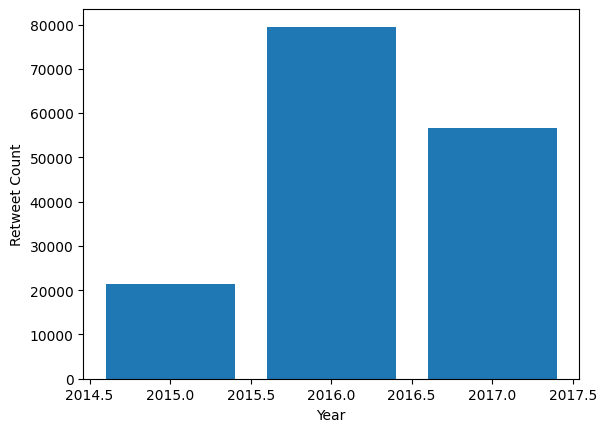

In [ ]:
plt.bar(df['created_at'].dt.year, df['retweet_count'])
plt.xlabel('Date')
plt.ylabel('Favorite')
plt.show()

Golden Retrievers dominate tweets, but Pembrokes get higher ratings, suggesting breed choice impacts engagement differently

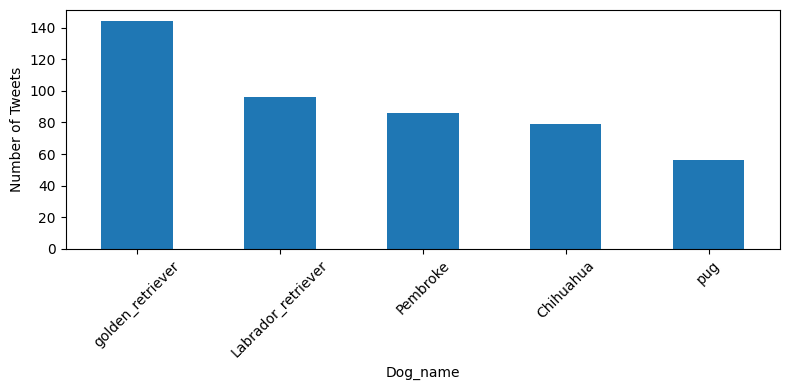

In [139]:
top_5 = df['Dog_name'].value_counts().head(5)
plt.figure(figsize=(8,4))
top_5.plot(kind='bar')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()